In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from scipy import stats
import statsmodels.api as sm
# Cargar el archivo CSV
data = pd.read_csv('Data_Caso_Propuesto.csv')  
# Mostrar las primeras 5 filas
data.head()

,Codigo,Ciudad,Departamento,Barrio,Direccion,Area Terreno,Area Construida,Detalle Disponibilidad,Estrato,Precio,Tipo de Inmueble,Datos Adicionales
0,17180,BOGOTA,CUNDINAMARCA,NaN,AV CR 7 NO. 166 - 51 LT B,0.00,0.0,COMERCIALIZABLE CON RESTRICCION,TRES,2.958081e+10,LOTE COMERCIAL,ESTE INMUEBLE SE COMERCIALIZARÁ A TRAVES DE SU...
1,19292,BOGOTA,CUNDINAMARCA,NaN,CL 72 No. 12 - 77,0.00,0.0,COMERCIALIZABLE,COMERCIAL,1.646059e+10,EDIFICIO,NaN
2,19292,BOGOTA,CUNDINAMARCA,NaN,CL 72 No. 12 - 77,0.00,0.0,COMERCIALIZABLE VENTA ANTICIPADA,COMERCIAL,1.646059e+10,EDIFICIO,NaN
3,2575,SOGAMOSO,BOYACÁ,CENTRO,CRA. 10 #11- 78/80 Ó CL 12 # 9 - 77/85 Ó CALLE...,1655.08,7269.0,COMERCIALIZABLE CON RESTRICCION,CUATRO,1.376828e+10,CLINICA,ESTE INMUEBLE SE COMERCIALIZARÁ A TRAVÉS DE SU...
4,11409,BUGA,VALLE DEL CAUCA,VEREDA CHAMBIMBAL,LT A1-A24 B1-B79 C1-C51 D1-D9 STA ROSA LT1-46 ...,3217197.00,22724.0,COMERCIALIZABLE FIDUCIA,RURAL,4.523379e+10,LOTE MIXTO,NaN


In [19]:
print("Total de filas:", data.shape[0])
print("Total de columnas:", data.shape[1])
print("\nTipos de datos por columna:\n", data.dtypes)

Total de filas: 463
Total de columnas: 12

Tipos de datos por columna:
 Codigo                      int64
Ciudad                     object
Departamento               object
Barrio                     object
Direccion                  object
Area Terreno              float64
Area Construida           float64
Detalle Disponibilidad     object
Estrato                    object
Precio                    float64
Tipo de Inmueble           object
Datos Adicionales          object
dtype: object


In [9]:
print("Valores nulos por columna:\n", data.isnull().sum())

Valores nulos por columna:
 Codigo                      0
Ciudad                      0
Departamento                0
Barrio                    423
Direccion                   0
Area Terreno                0
Area Construida             0
Detalle Disponibilidad      0
Estrato                     0
Precio                      0
Tipo de Inmueble            0
Datos Adicionales         345
dtype: int64


In [11]:
print("Registros duplicados:", data.duplicated().sum())

Registros duplicados: 0


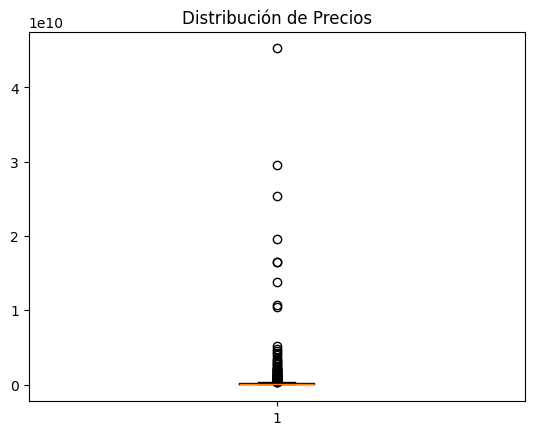

In [23]:
plt.boxplot(data['Precio'])
plt.title('Distribución de Precios')
plt.show()

In [25]:
print(data.describe())

             Codigo  Area Terreno  Area Construida        Precio
count    463.000000  4.630000e+02       463.000000  4.630000e+02
mean   18003.151188  1.515204e+04        87.517279  6.672032e+08
std     1992.191499  1.827101e+05      1137.469077  3.272992e+09
min     2575.000000  0.000000e+00         0.000000  4.650000e+06
25%    18184.500000  0.000000e+00         0.000000  1.230500e+07
50%    18332.000000  0.000000e+00         0.000000  1.587000e+07
75%    18539.500000  0.000000e+00         0.000000  1.379955e+08
max    19344.000000  3.217197e+06     22724.000000  4.523379e+10


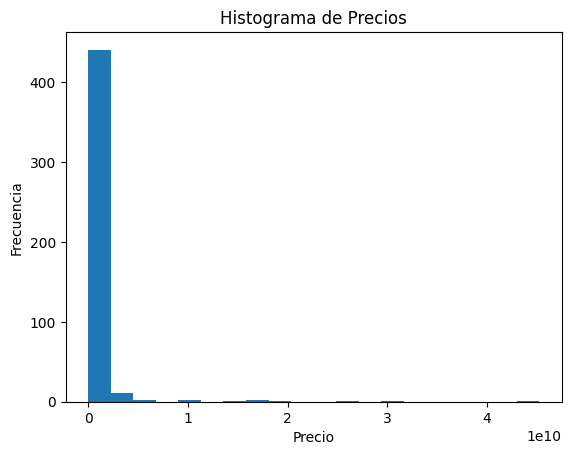

In [27]:
plt.hist(data['Precio'], bins=20)
plt.title('Histograma de Precios')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.show()

In [29]:
print(data[['Precio', 'Area Terreno']].describe())

             Precio  Area Terreno
count  4.630000e+02  4.630000e+02
mean   6.672032e+08  1.515204e+04
std    3.272992e+09  1.827101e+05
min    4.650000e+06  0.000000e+00
25%    1.230500e+07  0.000000e+00
50%    1.587000e+07  0.000000e+00
75%    1.379955e+08  0.000000e+00
max    4.523379e+10  3.217197e+06


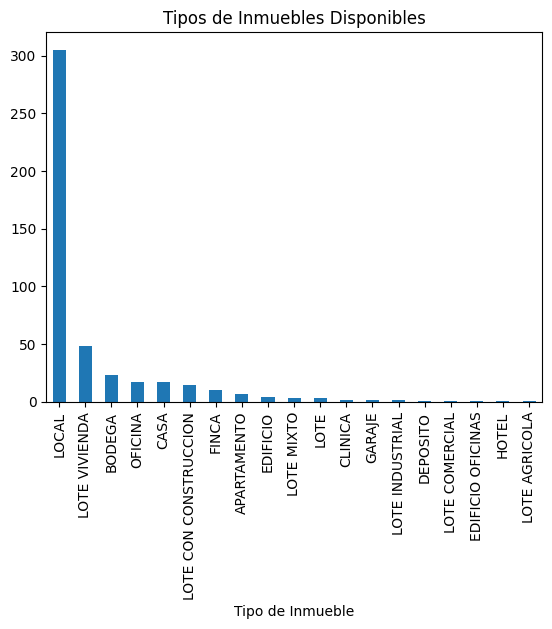

In [32]:
data['Tipo de Inmueble'].value_counts().plot(kind='bar')
plt.title('Tipos de Inmuebles Disponibles')
plt.show()

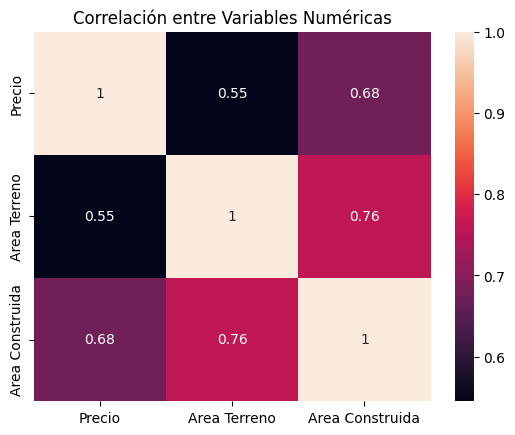

In [36]:
sns.heatmap(data[['Precio', 'Area Terreno', 'Area Construida']].corr(), annot=True)
plt.title('Correlación entre Variables Numéricas')
plt.show()

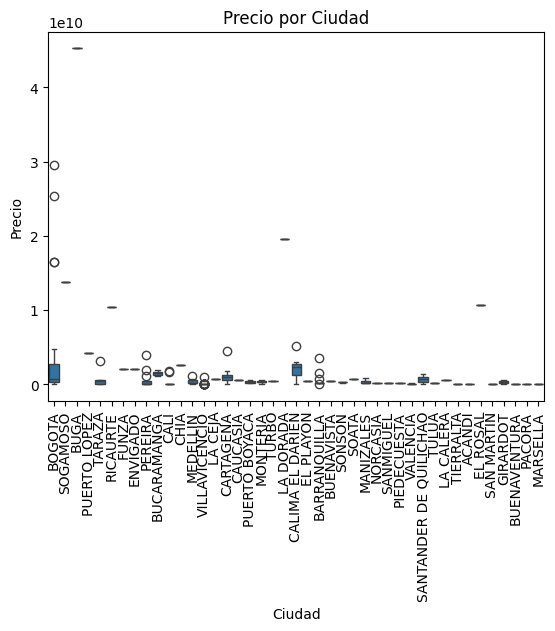

In [38]:
sns.boxplot(x='Ciudad', y='Precio', data=data)
plt.xticks(rotation=90)
plt.title('Precio por Ciudad')
plt.show()

In [40]:
data.drop_duplicates(inplace=True)

In [21]:
print(data.describe())

             Codigo  Area Terreno  Area Construida        Precio
count    463.000000  4.630000e+02       463.000000  4.630000e+02
mean   18003.151188  1.515204e+04        87.517279  6.672032e+08
std     1992.191499  1.827101e+05      1137.469077  3.272992e+09
min     2575.000000  0.000000e+00         0.000000  4.650000e+06
25%    18184.500000  0.000000e+00         0.000000  1.230500e+07
50%    18332.000000  0.000000e+00         0.000000  1.587000e+07
75%    18539.500000  0.000000e+00         0.000000  1.379955e+08
max    19344.000000  3.217197e+06     22724.000000  4.523379e+10


In [50]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463 entries, 0 to 462
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Codigo                  463 non-null    int64  
 1   Ciudad                  463 non-null    object 
 2   Departamento            463 non-null    object 
 3   Barrio                  40 non-null     object 
 4   Direccion               463 non-null    object 
 5   Area Terreno            463 non-null    float64
 6   Area Construida         463 non-null    float64
 7   Detalle Disponibilidad  463 non-null    object 
 8   Estrato                 463 non-null    object 
 9   Precio                  463 non-null    float64
 10  Tipo de Inmueble        463 non-null    object 
 11  Datos Adicionales       118 non-null    object 
 12  Precio por m²           463 non-null    float64
dtypes: float64(4), int64(1), object(8)
memory usage: 47.2+ KB
None


In [52]:
# Calcular frecuencias y porcentajes
distribucion = data['Tipo de Inmueble'].value_counts(normalize=True) * 100
# Mostrar resultados
print("Distribución porcentual de tipos de inmueble:")
print(distribucion.round(2))  # Redondear a 2 decimales

Distribución porcentual de tipos de inmueble:
Tipo de Inmueble
LOCAL                    65.87
LOTE VIVIENDA            10.37
BODEGA                    4.97
OFICINA                   3.67
CASA                      3.67
LOTE CON CONSTRUCCION     3.24
FINCA                     2.16
APARTAMENTO               1.51
EDIFICIO                  0.86
LOTE MIXTO                0.65
LOTE                      0.65
CLINICA                   0.43
GARAJE                    0.43
LOTE INDUSTRIAL           0.43
DEPOSITO                  0.22
LOTE COMERCIAL            0.22
EDIFICIO OFICINAS         0.22
HOTEL                     0.22
LOTE AGRICOLA             0.22
Name: proportion, dtype: float64


In [54]:
# Calcular porcentaje de nulos
nulos = data.isnull().sum() / len(data) * 100
# Filtrar columnas con nulos
nulos = nulos[nulos > 0]
print("Porcentaje de valores nulos:")
print(nulos.round(2))

Porcentaje de valores nulos:
Barrio               91.36
Datos Adicionales    74.51
dtype: float64


In [56]:
estrato = data['Estrato'].value_counts(normalize=True) * 100
print("Distribución por estrato:")
print(estrato)

Distribución por estrato:
Estrato
COMERCIAL     66.306695
RURAL          8.639309
UNO            4.535637
TRES           4.103672
CUATRO         4.103672
INDUSTRIAL     3.455724
DOS            3.455724
SEIS           3.239741
CINCO          2.159827
Name: proportion, dtype: float64


In [58]:
bins = [0, 100000000, 500000000, 1000000000, float('inf')]
labels = ['<100M', '100M-500M', '500M-1B', '>1B']
data['Rango Precio'] = pd.cut(data['Precio'], bins=bins, labels=labels)
# Calcular porcentajes
rango_precios = data['Rango Precio'].value_counts(normalize=True) * 100
print(rango_precios.sort_index())

Rango Precio
<100M        73.650108
100M-500M     9.719222
500M-1B       6.047516
>1B          10.583153
Name: proportion, dtype: float64


In [60]:
top_ciudades = data['Ciudad'].value_counts(normalize=True).head(5) * 100
print("Top 5 ciudades con más inmuebles:")
print(top_ciudades.round(2))

Top 5 ciudades con más inmuebles:
Ciudad
VILLAVICENCIO    62.63
BOGOTA            4.97
CARTAGENA         3.89
BARRANQUILLA      3.67
PACORA            3.46
Name: proportion, dtype: float64


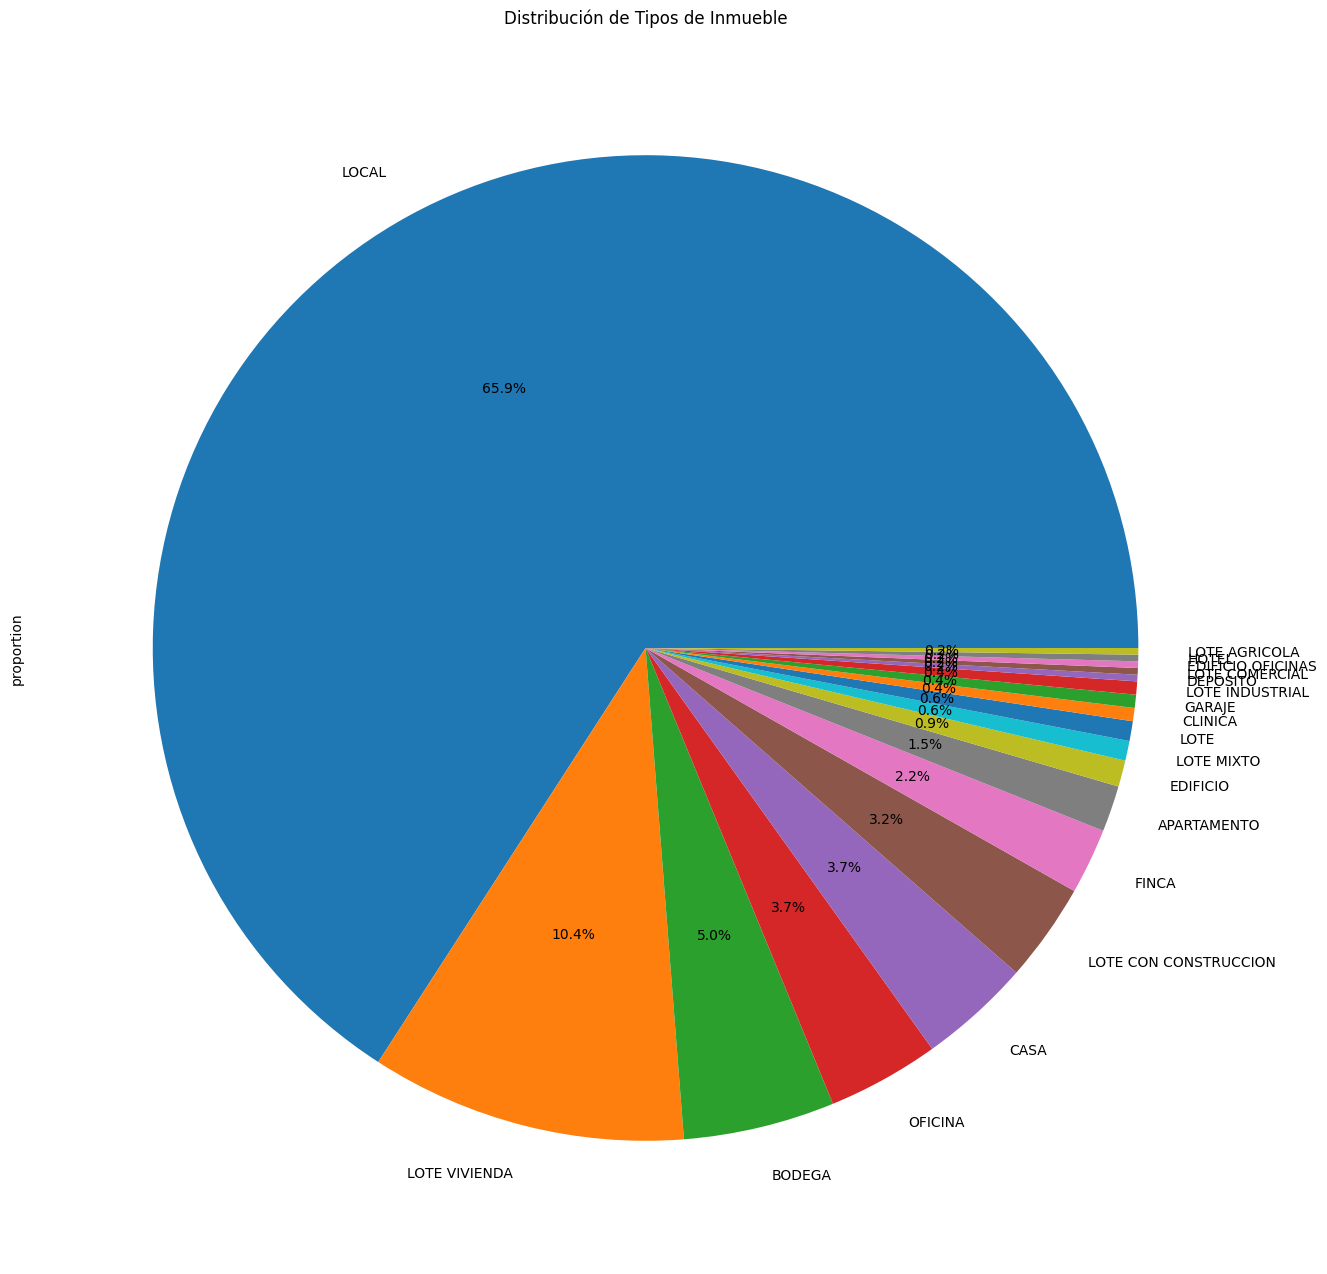

In [15]:
plt.figure(figsize=(16, 16))
data['Tipo de Inmueble'].value_counts(normalize=True).plot.pie(autopct='%1.1f%%')
plt.title('Distribución de Tipos de Inmueble')
plt.show()

In [27]:
total_registros = len(data)
total_columnas = len(data.columns)
print("total registros: ", total_registros)
print("total columnas: ", total_columnas)

total registros:  463
total columnas:  12


In [29]:
detalles_columnas = data.dtypes
print(detalles_columnas)

Codigo                      int64
Ciudad                     object
Departamento               object
Barrio                     object
Direccion                  object
Area Terreno              float64
Area Construida           float64
Detalle Disponibilidad     object
Estrato                    object
Precio                    float64
Tipo de Inmueble           object
Datos Adicionales          object
dtype: object


In [31]:
columnas_categoricas = data.select_dtypes(include=['object']).columns
columnas_numericas = data.select_dtypes(include=['int64', 'float64']).columns
print("Columnas Categóricas:")
print(columnas_categoricas)
print("Columnas Numéricas:")
print(columnas_numericas)

Columnas Categóricas:
Index(['Ciudad', 'Departamento', 'Barrio', 'Direccion',
       'Detalle Disponibilidad', 'Estrato', 'Tipo de Inmueble',
       'Datos Adicionales'],
      dtype='object')
Columnas Numéricas:
Index(['Codigo', 'Area Terreno', 'Area Construida', 'Precio'], dtype='object')


In [33]:
columnas_con_nulos = data.columns[data.isnull().any()]
print("Columnas con Valores Nulos:")
print(columnas_con_nulos)

Columnas con Valores Nulos:
Index(['Barrio', 'Datos Adicionales'], dtype='object')


In [35]:
registros_duplicados = data.duplicated().sum()
print(f"Total de Registros Duplicados: {registros_duplicados}")

Total de Registros Duplicados: 0


In [37]:
reporte_estadistico = data.describe()
print(reporte_estadistico)

             Codigo  Area Terreno  Area Construida        Precio
count    463.000000  4.630000e+02       463.000000  4.630000e+02
mean   18003.151188  1.515204e+04        87.517279  6.672032e+08
std     1992.191499  1.827101e+05      1137.469077  3.272992e+09
min     2575.000000  0.000000e+00         0.000000  4.650000e+06
25%    18184.500000  0.000000e+00         0.000000  1.230500e+07
50%    18332.000000  0.000000e+00         0.000000  1.587000e+07
75%    18539.500000  0.000000e+00         0.000000  1.379955e+08
max    19344.000000  3.217197e+06     22724.000000  4.523379e+10


In [39]:
print("Tipos de datos de cada columna:")
print(data.dtypes)

print("\nValores nulos en cada columna:")
print(data.isnull().sum())

print("\nValores únicos en cada columna:")
print(data.nunique())

print("\nDescripción de columnas numéricas:")
print(data.describe())

print("\nValores únicos en la columna 'Detalle Disponibilidad':")
print(data['Detalle Disponibilidad'].unique())

print("\nValores únicos en la columna 'Estrato':")
print(data['Estrato'].unique())

print("\nValores únicos en la columna 'Tipo de Inmueble':")
print(data['Tipo de Inmueble'].unique())

Tipos de datos de cada columna:
Codigo                      int64
Ciudad                     object
Departamento               object
Barrio                     object
Direccion                  object
Area Terreno              float64
Area Construida           float64
Detalle Disponibilidad     object
Estrato                    object
Precio                    float64
Tipo de Inmueble           object
Datos Adicionales          object
dtype: object

Valores nulos en cada columna:
Codigo                      0
Ciudad                      0
Departamento                0
Barrio                    423
Direccion                   0
Area Terreno                0
Area Construida             0
Detalle Disponibilidad      0
Estrato                     0
Precio                      0
Tipo de Inmueble            0
Datos Adicionales         345
dtype: int64

Valores únicos en cada columna:
Codigo                    456
Ciudad                     43
Departamento               14
Barrio            

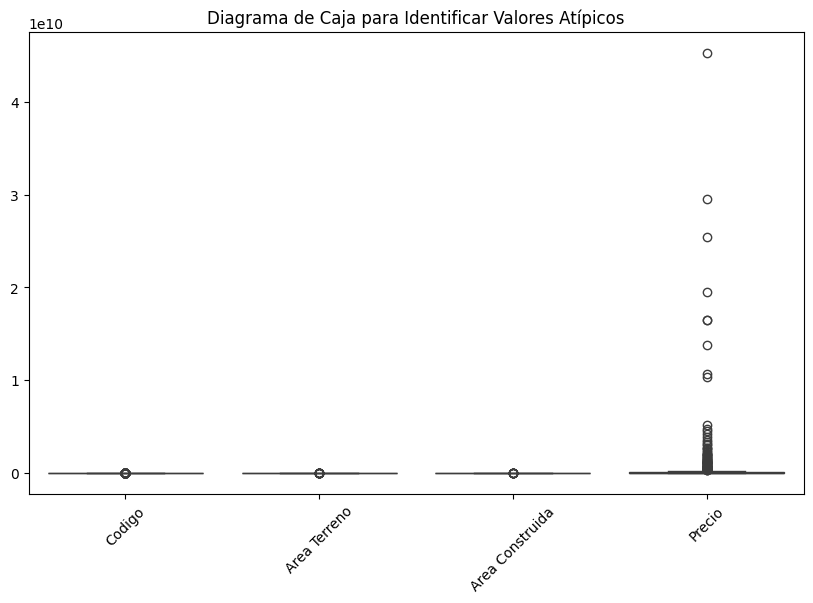

In [42]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data[columnas_numericas])
plt.title("Diagrama de Caja para Identificar Valores Atípicos")
plt.xticks(rotation=45)
plt.show()

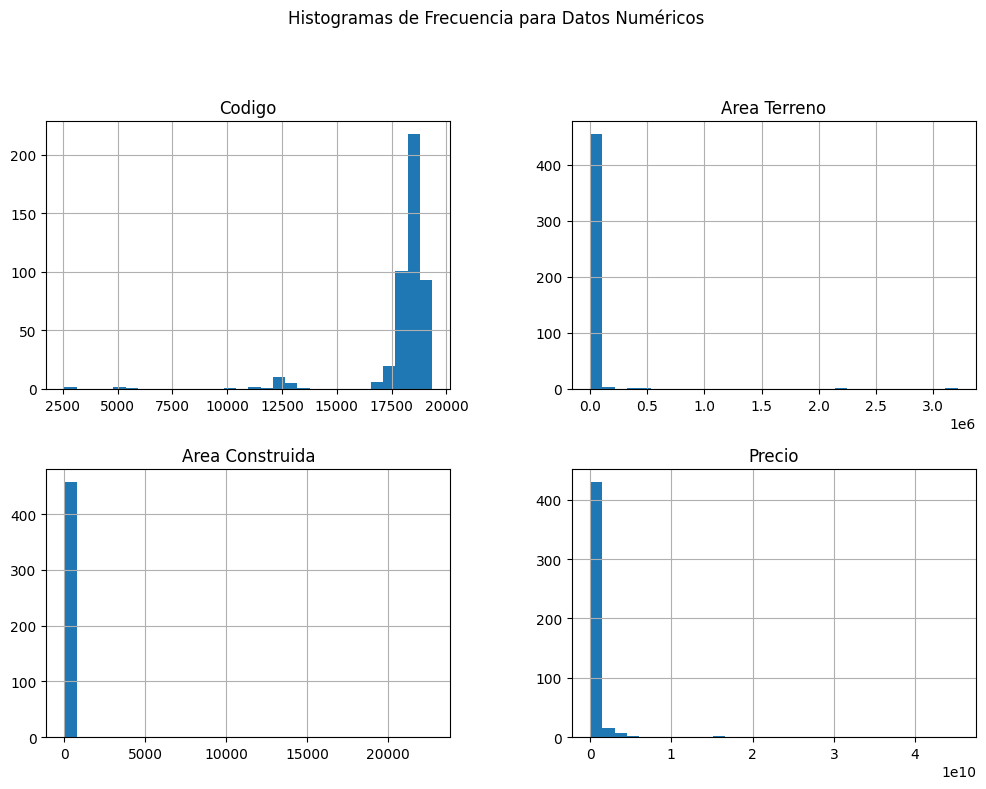

In [44]:
data[columnas_numericas].hist(bins=30, figsize=(12, 8))
plt.suptitle("Histogramas de Frecuencia para Datos Numéricos", y=1.02)
plt.show()

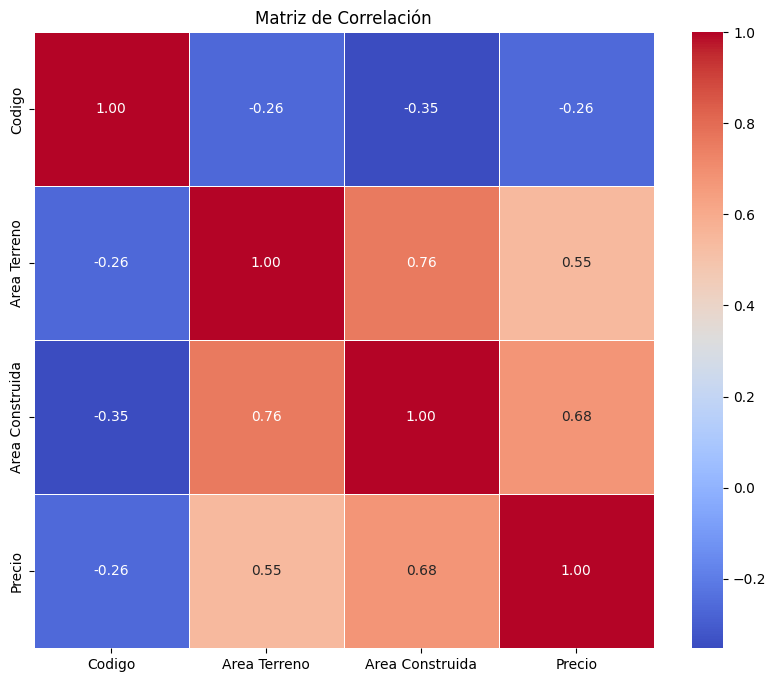

In [48]:
# Seleccionar solo las columnas numéricas para la correlación
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Calcular la matriz de correlación
correlacion = numeric_data.corr()

# Crear el heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlacion, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlación")
plt.show()

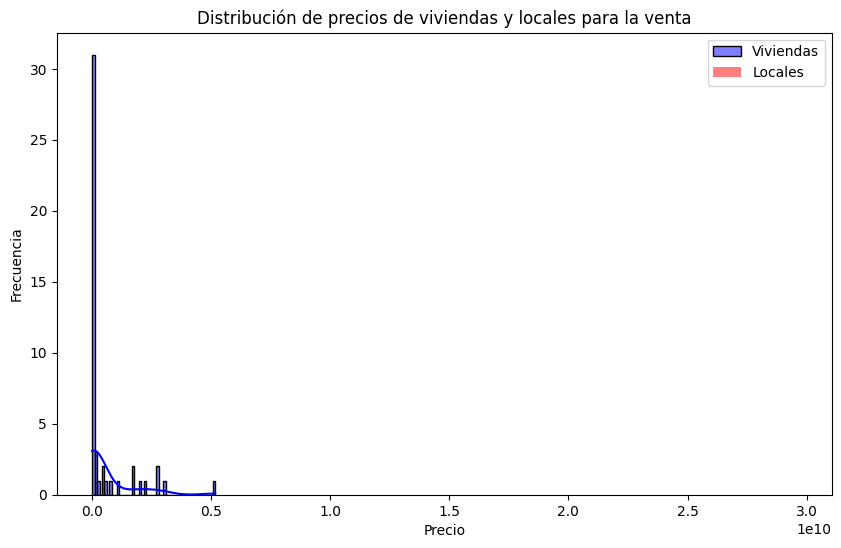

In [52]:
inmuebles_vivienda = data[data['Tipo de Inmueble'] == 'LOTE VIVIENDA']
inmuebles_local = data[data['Tipo de Inmueble'] == 'LOTE COMERCIAL']
plt.figure(figsize=(10, 6))
sns.histplot(inmuebles_vivienda['Precio'], bins=50, kde=True, color='blue', label='Viviendas')
sns.histplot(inmuebles_local['Precio'], bins=50, kde=True, color='red', label='Locales')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.title('Distribución de precios de viviendas y locales para la venta')
plt.legend()
plt.show()

Prueba de normalidad de Shapiro-Wilk para 'Precio':
Estadístico de prueba: 0.19177406098579708
P-valor: 1.925913370782628e-40
Los datos no parecen provenir de una distribución normal.


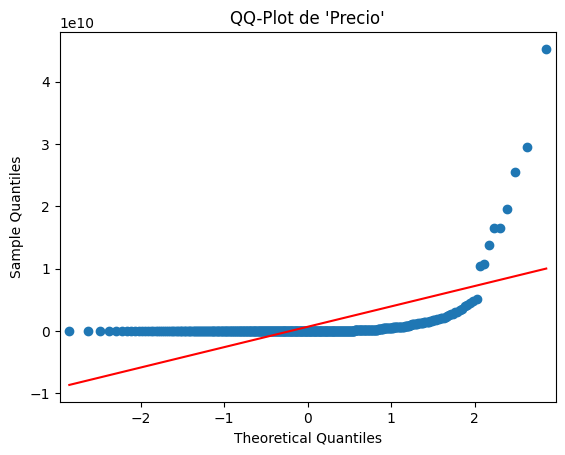

In [56]:
df = pd.read_csv('Data_Caso_Propuesto.csv')
columna_precio = 'Precio'
datos = df[columna_precio].dropna()
stat, p_valor = stats.shapiro(datos)
nivel_significancia = 0.05
print(f"Prueba de normalidad de Shapiro-Wilk para '{columna_precio}':")
print(f"Estadístico de prueba: {stat}")
print(f"P-valor: {p_valor}")
if p_valor > nivel_significancia:
 print("Los datos parecen provenir de una distribución normal.")
else:
 print("Los datos no parecen provenir de una distribución normal.")
sm.qqplot(datos, line='s')
plt.title(f"QQ-Plot de '{columna_precio}'")
plt.show()